# Vectors in Python Tutorial
Utilizing Python library GeoPandas

Vector file types:
- .tab
- .shp

Vector types:
- Polygon
- MultiPolygon
- Point

## Resources

GeoPandas
<br>http://geopandas.org/

This dataset shows the location of each ambient air quality monitoring station currently being operated by the Bureau of Air Quality Surveillance.
<br>https://gis.ny.gov/gisdata/inventories/details.cfm?DSID=1159

In [1]:
import geopandas as gpd
import matplotlib

from shapely.geometry import MultiPolygon

%matplotlib inline

In [2]:
# Vector type: MultiPolygon
towns = gpd.read_file("NYC/cities_towns/Cities_Towns.shp")

# Vector type: Points
stations = gpd.read_file("NYC/AirMonStations/DEC_air_monitoring_stations_2017.shp")

In [3]:
stations[["COUNTY","MUNICIPALI","geometry"]].head()

,COUNTY,MUNICIPALI,geometry
0,Niagara,Niagara Falls,POINT (-79.01050 43.09654)
1,Chautauqua,Dunkirk,POINT (-79.31880 42.49970)
2,Erie,Buffalo,POINT (-78.80974 42.87695)
3,Erie,Buffalo Near-Road,POINT (-78.76611 42.92111)
4,Erie,Grand Island Blvd,POINT (-78.91847 42.98829)


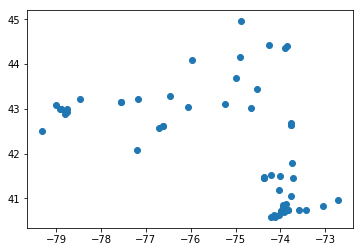

In [4]:
stations.plot()

In [5]:
stations.crs

{u'init': u'epsg:4269'}

In [6]:
towns[["NAME","COUNTY","geometry"]].head(3)

,NAME,COUNTY,geometry
0,Adams,Jefferson,"POLYGON ((419711.937 4860894.762, 420725.148 4..."
1,Addison,Steuben,"POLYGON ((311738.502 4672651.742, 312215.800 4..."
2,Afton,Chenango,"POLYGON ((457510.038 4679307.408, 457514.525 4..."


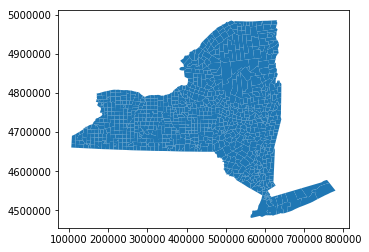

In [7]:
towns.plot()

In [8]:
towns.crs

{u'init': u'epsg:26918'}

In [9]:
newtowns = towns.to_crs({'init': 'epsg:4326'})

newtowns.crs

{'init': 'epsg:4326'}

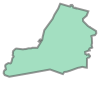

In [10]:
ny = newtowns[newtowns["NAME"]=="New York"]["geometry"].tolist()[0]
ny

In [11]:
# geo_interface outputs a GeoJSON representation of the vector

geojson_ny = ny.__geo_interface__

print("Keys in __geo_interface__:")
for keys in geojson_ny:
    print(keys)
    
print("\ntype: {}".format(geojson_ny["type"]))
print("coordinate 0: \n{}".format(geojson_ny["coordinates"][0]))

Keys in __geo_interface__:
type
coordinates

type: MultiPolygon
coordinate 0: 
(((-74.04375701313673, 40.690111503291675), (-74.04346186963684, 40.689729525915034), (-74.04345048548349, 40.689734922289084), (-74.04268127431347, 40.69009952202821), (-74.04267690876182, 40.69009404106871), (-74.0426112849145, 40.69001164892306), (-74.04338013131147, 40.68963552020056), (-74.04341878265308, 40.68948283232098), (-74.04342436066447, 40.689460799523495), (-74.04348447831997, 40.68922331738124), (-74.04353996714316, 40.689004115703526), (-74.04360960040147, 40.68872903951636), (-74.04361067913027, 40.68872477660534), (-74.0436465815503, 40.68870625700304), (-74.04390957606171, 40.688570593982575), (-74.04397434595307, 40.68856519375626), (-74.04399413570447, 40.68856354332084), (-74.0444348536754, 40.68852679425423), (-74.04444634930366, 40.688525835408086), (-74.04455442973072, 40.68851682237659), (-74.04456706282268, 40.688515769334245), (-74.04470075604058, 40.688568134301434), (-74.045659

## Helpful Functions

In [12]:
def gpd_polygons_to_multipolygon(frame):
    polygons = []
    for idx, data in frame.geometry.iteritems():
        polygons.append(data)

    return MultiPolygon(polygons)

# Geopandas
def change_shapely_crs(shpl,source_crs,final_crs):
    gpd_box = gpd.GeoDataFrame(index=[0], crs=source_crs, geometry=[shpl])  
    gpd_box = gpd_box.to_crs(final_crs)
    return Polygon(gpd_box["geometry"][0])

from functools import partial
import pyproj
from shapely.ops import transform

# pyproj1
def change_shapely_crs(shpl,source_crs,final_crs):
    project = partial(
        pyproj.transform,
        pyproj.Proj(init=source_crs.to_string()), # source coordinate system
        pyproj.Proj(init=final_crs['init'])) # destination coordinate system

    g2 = transform(project, g1)
    return g2

# pyproj2
# user statement: This is much faster becase pyproj
# does not need to recreate the projection for every point.
def change_shapely_crs(shpl,source_crs,final_crs):
    project = pyproj.Transformer.from_proj(
        pyproj.Proj(init=source_crs.to_string()), # source coordinate system
        pyproj.Proj(init=final_crs['init'])) # destination coordinate system

    # g1 is a shapley Polygon
    g2 = transform(project.transform, shpl)  # apply projection
    return g2